#  Covid-19 e o Crescimento de Políticas Autoritárias-Nacionalistas

A pandemia Covid-19 trouxe muitos desafios para as nossas sociedades. Hoje, ainda lidamos com os problemas de saúde pública e não tivemos o tempo e a clareza de espírito para pensar no que vai chegar.
Na análise que vou apresentar pretendo olhar para a possível ligação entre o aparecimento desta pandemia e o crescimento de tendências políticas ligadas ao Autoritarismo e Nacionalismo.

A reação muito natural da população quando um novo vírus aparece é ter receio do que vem de fora. Esta reação irracional torna-nos mais permiáveis a narrativas nacionalistas.

Já todos ouvimos o líder de uma das maiores nações do Mundo - Donald Trump - chamar ao vírus Covid-19 o *Vírus Chinês*. Muitos países, numa tentativa de conter a pandemia, fecharam fronteiras. Assistimos a um avião que transportava material médico para Espanha ser bloqueado pelo governo Turco de modo a utilizar o material para o próprio sistema de saúde.

Um [estudo] (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0062275#pone.0062275-Thornhill1) mostrou evidências que ligam o risco patogénico e políticas autoritárias-nacionalistas. Adicionalmente, nos últimos anos já vinhamos verificando o aumento gradual de discursos populistas e nacionalistas, ver [People vs. Democracy] (https://www.amazon.com/People-vs-Democracy-Freedom-Danger/dp/0674976827).

Será que estamos a assistir a um aumento da popularidade de discursos nacionalistas-autoritários nos principais países desenvolvidos? E em Portugal?

Alguns imports que vão ser úteis ao longo da análise

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

## Como estavam a evoluir as sondagens no período pre-Covid19?

In [262]:
# Load italian polls for a pandas dataframe
italy_polls = pd.read_csv("./Polls/it.csv")
italy_polls.head()

,Polling Firm,Commissioners,Fieldwork Start,Fieldwork End,Scope,Sample Size,Sample Size Qualification,Participation,Precision,Movimento 5 Stelle,...,La Sinistra,Più Europa,Europa Verde,Cambiamo!,Azione,Italia Viva,Noi con l’Italia,Potere al Popolo,CasaPound Italia,Other
0,Ixè,Rai 3,2020-03-30,2020-03-31,National,1000,Provided,Not Available,0.1%,15.6%,...,3.9%,2.0%,1.8%,Not Available,1.6%,1.9%,Not Available,Not Available,Not Available,3.9%
1,SWG,NaN,2020-03-25,2020-03-30,National,1200,Provided,Not Available,0.1%,14.9%,...,3.3%,2.2%,2.2%,1.0%,2.7%,3.3%,Not Available,Not Available,Not Available,2.9%
2,Tecnè,Agenzia Dire,2020-03-26,2020-03-27,National,1000,Provided,Not Available,0.1%,13.6%,...,2.6%,1.7%,1.6%,Not Available,1.7%,3.1%,Not Available,Not Available,Not Available,3.7%
3,Termometro Politico,NaN,2020-03-25,2020-03-26,National,2200,Provided,Not Available,0.1%,13.6%,...,2.1%,1.5%,1.5%,Not Available,2.8%,3.4%,Not Available,Not Available,Not Available,4.5%
4,Euromedia,NaN,2020-03-26,2020-03-26,National,800,Estimated/Assumed,Not Available,0.1%,14.5%,...,2.1%,1.8%,1.3%,0.4%,2.3%,3.5%,Not Available,Not Available,Not Available,4.7%


In [263]:
# Investigate data types for the existing dataframes
print(italy_polls.dtypes)

Polling Firm                 object
Commissioners                object
Fieldwork Start              object
Fieldwork End                object
Scope                        object
Sample Size                  object
Sample Size Qualification    object
Participation                object
Precision                    object
Movimento 5 Stelle           object
Partito Democratico          object
Lega Nord                    object
Forza Italia                 object
Fratelli d’Italia            object
La Sinistra                  object
Più Europa                   object
Europa Verde                 object
Cambiamo!                    object
Azione                       object
Italia Viva                  object
Noi con l’Italia             object
Potere al Popolo             object
CasaPound Italia             object
Other                        object
dtype: object


Quase todas as colunas apresentam o tipo de dados incorrecto:
    - Fiedlwork Start  and Fieldwork End deve ser uma data;
    - Sample Size deve ser um inteiro;
    - From Participation até à última coluna deve ser um decimal.

In [264]:
# Change data types to float for percetage columns and apply the mean for NaN values 
for i in range(7, 24):
    italy_polls.iloc[:, i] = italy_polls.iloc[:, i].apply(lambda x: x.replace('%', ''))
    italy_polls.iloc[:, i].replace('Not Available', np.nan, inplace = True)
    italy_polls.iloc[:, i] = italy_polls.iloc[:, i].astype("float")/100
    
    # Replace Not Available results by the mean of the existing values
    mean = italy_polls.iloc[:, i].mean()
    italy_polls.iloc[:, i].replace(np.nan, mean, inplace = True)

In [265]:
# Change Sample Size data type to int 
italy_polls["Sample Size"].replace('Not Available', "0", inplace = True)
italy_polls["Sample Size"] = italy_polls["Sample Size"].astype("int")

In [266]:
# Change Fieldwork Start and End to datetime type
italy_polls["Fieldwork Start"] = pd.to_datetime(italy_polls["Fieldwork Start"], format="%Y-%m-%d")
italy_polls["Fieldwork End"] = pd.to_datetime(italy_polls["Fieldwork End"], format="%Y-%m-%d")

print(italy_polls.dtypes)

Polling Firm                         object
Commissioners                        object
Fieldwork Start              datetime64[ns]
Fieldwork End                datetime64[ns]
Scope                                object
Sample Size                           int64
Sample Size Qualification            object
Participation                       float64
Precision                           float64
Movimento 5 Stelle                  float64
Partito Democratico                 float64
Lega Nord                           float64
Forza Italia                        float64
Fratelli d’Italia                   float64
La Sinistra                         float64
Più Europa                          float64
Europa Verde                        float64
Cambiamo!                           float64
Azione                              float64
Italia Viva                         float64
Noi con l’Italia                    float64
Potere al Popolo                    float64
CasaPound Italia                

Vamos verificar as estatísticas básicas do conjunto de dados que temos sobre as sondagens italianas.

In [267]:
italy_polls.describe()

,Sample Size,Participation,Precision,Movimento 5 Stelle,Partito Democratico,Lega Nord,Forza Italia,Fratelli d’Italia,La Sinistra,Più Europa,Europa Verde,Cambiamo!,Azione,Italia Viva,Noi con l’Italia,Potere al Popolo,CasaPound Italia,Other
count,693.000000,0.0,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1235.946609,NaN,0.001610,0.225736,0.194587,0.310176,0.085206,0.064346,0.024573,0.022872,0.017077,0.009726,0.018994,0.043872,0.006138,0.018444,0.008143,0.046454
std,828.354022,NaN,0.001506,0.060301,0.020515,0.038547,0.021766,0.029790,0.005779,0.006163,0.001970,0.001728,0.003285,0.004704,0.001366,0.002144,0.000182,0.022573
min,0.000000,NaN,0.001000,0.105000,0.147000,0.180000,0.046000,0.023000,0.004000,0.010000,0.009000,0.002000,0.005000,0.019000,0.001000,0.005000,0.006000,0.006000
25%,860.000000,NaN,0.001000,0.173000,0.179000,0.301000,0.068000,0.040000,0.020000,0.019000,0.017077,0.009726,0.018994,0.043872,0.006138,0.018444,0.008143,0.032000
50%,1000.000000,NaN,0.001000,0.220000,0.191000,0.317000,0.081000,0.050000,0.024573,0.022872,0.017077,0.009726,0.018994,0.043872,0.006138,0.018444,0.008143,0.042000
75%,1500.000000,NaN,0.001000,0.279000,0.209000,0.331000,0.100000,0.086000,0.028000,0.027000,0.017077,0.009726,0.018994,0.043872,0.006138,0.018444,0.008143,0.057000
max,16000.000000,NaN,0.010000,0.352000,0.250000,0.389000,0.140000,0.142000,0.044000,0.049000,0.025000,0.023000,0.035000,0.066000,0.016000,0.028000,0.011000,0.147000


Com o conjunto de dados corrigido, podemos começar a mostrar as tendências de voto nos diferentes partidos italianos até à data de ínicio da pandemia Covid-19.

O vírus foi considerado uma Emergência de Saúde Pública Internacional a 30 de Janeiro de 2020. Numa primeira fase vamos considerar todas as sondagens realizadas até esta data e perceber se existia alguma tendência autoritária-nacionalista nas intenções de voto dos italianos.

In [268]:
# Create two new columns: one for nacionalist parties and one for non nacionalist

italy_polls["nacionalist"] = italy_polls["Lega Nord"] + italy_polls["Fratelli d’Italia"] + italy_polls["CasaPound Italia"]
italy_polls["non_nacionalist"] = italy_polls["Movimento 5 Stelle"] + italy_polls["Partito Democratico"] + italy_polls["Forza Italia"] + italy_polls["La Sinistra"] + italy_polls["Più Europa"] + italy_polls["Europa Verde"] + italy_polls["Azione"] + italy_polls["Italia Viva"] + italy_polls["Noi con l’Italia"] + italy_polls["Potere al Popolo"]

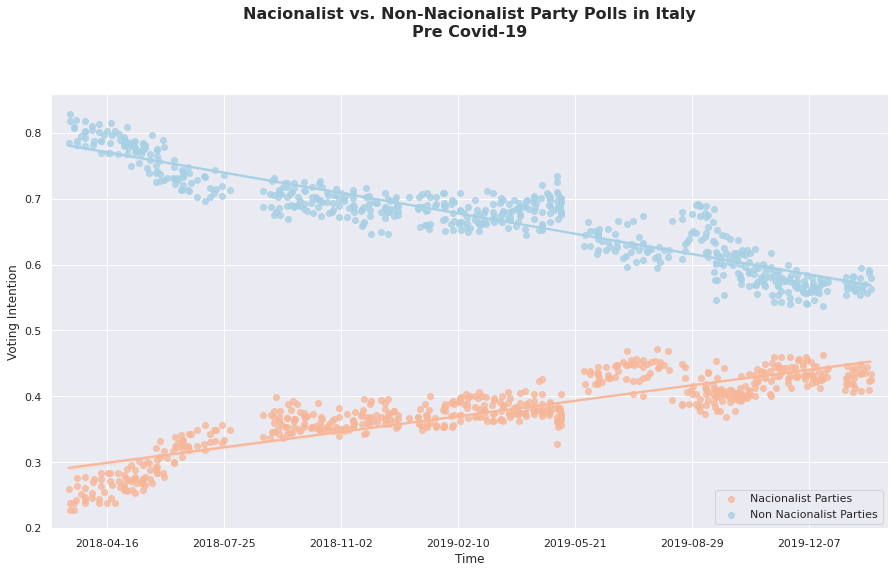

In [269]:
# Inicialize seaborn plot
sns.set(style="dark")
sns.set(rc={'figure.figsize':(15, 8)})

# Set your custom color palette
sns.set_palette(sns.color_palette("RdBu", n_colors=2))

# In order to plot a linear regression we need to use add a auxiliary columns.
# This columns will contain the date ordinals
italy_polls["Date Ordinal"] = italy_polls["Fieldwork End"].apply(lambda date: date.toordinal())

# Filter dataframe for pre Covid-19 crisis
italy_polls_pre_covid = italy_polls[italy_polls["Date Ordinal"]<pd.to_datetime("2020-01-30", format="%Y-%m-%d").toordinal()]

# Plot polls results with linear regression
ax_italian = sns.regplot(x = "Date Ordinal", y="nacionalist", data=italy_polls_pre_covid, label = "Nacionalist Parties")
ax2_italian = sns.regplot(x = "Date Ordinal", y="non_nacionalist", data=italy_polls_pre_covid, ax = ax_italian, label = "Non Nacionalist Parties")


# Add axis, legend and title
ax_italian.set(xlim=(italy_polls_pre_covid["Date Ordinal"].min()-15, italy_polls_pre_covid["Date Ordinal"].max()+15))
ax_italian.set_title("Nacionalist vs. Non-Nacionalist Party Polls in Italy\nPre Covid-19",y=1.12,fontsize=16,fontweight='bold')
ax_italian.set_ylabel("Voting Intention")
ax_italian.set_xlabel("Time")
ax_italian.legend(loc="lower right")
new_labels = [date.fromordinal(int(item)) for item in ax_italian.get_xticks()]
ax_italian.set_xticklabels(new_labels)

plt.show()

É perfeitamente visível no gráfico acima que até ao aparecimento do Covid-19 na China já existia uma tendência de aumento da intenção de voto em partidos nacionalistas. 
Os declives das rectas de regressão linear é apresentado de seguida para ambos os casos.

In [270]:
# get coeffs of linear fit
slope_nacionalist, intercept_nacionalist, r_value_nacionalist, p_value_nacionalist, std_err_nacionalist = stats.linregress(italy_polls_pre_covid["Date Ordinal"],italy_polls_pre_covid["nacionalist"])
slope_non_nacionalist, intercept_non_nacionalist, r_value_non_nacionalist, p_value_non_nacionalist, std_err_non_nacionalist = stats.linregress(italy_polls_pre_covid["Date Ordinal"],italy_polls_pre_covid["non_nacionalist"])

print("Nacionalist parties regression slope is ",slope_nacionalist)
print("Non-Nacionalist parties regression slope is ",slope_non_nacionalist)

Nacionalist parties regression slope is  0.00023537405605988728
Non-Nacionalist parties regression slope is  -0.0003088494778019001
